In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym

# Over relaxation

In [2]:
Min, Max, N = 0.,40.,11
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [3]:
def h1(y):
    return 100.
def h2(y):
    return 0.
def h3(x):
    return 0.
def h4(x):
    return 0.

In [4]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [5]:
def GetRelaxation(T, Nit = int(1e5), omega = 1.9, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in range(Nit):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return T,itmax

In [6]:
omega = np.arange(0.1,2.0,0.1)
its = []

In [7]:
for val in omega:
    T = InitT()
    Tf1,ite =  GetRelaxation(T, omega=val)
    its.append(ite)

585
345
243
185
147
120
99
83
69
58
49
40
33
25
18
19
19
32
64


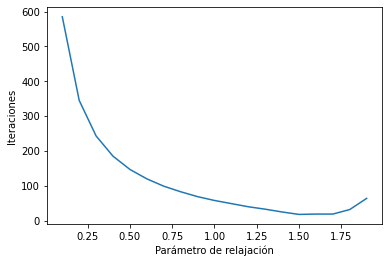

In [8]:
plt.plot(omega, its)
plt.xlabel('Parámetro de relajación')
plt.ylabel('Iteraciones')
plt.show()

In [9]:
omega

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

El parámetro óptimo es cercano a 1.5

Para parámetros mayores o iguales a 2.0, el método de sobrerelajación no converge. Esto tiene que ver con el hecho de que un método iterativo (como el de sobrerelajación) converge si el radio espectral de la matriz asociada es menor a 1. Si el parámetro de sobrerelajación está fuera del intervalo $(0,2)$ el radio espectral supera 1 y por ende no converge.

# 2D Navier-Stokes equations

Note que las primeras derivadas de una función de dos variables, $x,y$ están dadas por 
$$ \frac{\partial f}{\partial x} = \frac{f(x+h,y)-f(x,y)}{h} = \frac{f_{i+1,j}-f_{i,j}}{h} = \frac{f_{i+1,j}-f_{i-1,j}}{2h} $$
$$ \frac{\partial f}{\partial y} = \frac{f(x,y+h)-f(x,y)}{h} = \frac{f_{i,j+1}-f_{i,j}}{h} = \frac{f_{i,j+1}-f_{i,j-1}}{2h} $$
$$ \frac{\partial^2 f}{\partial x^2} = \frac{f(x-h,y)-2f(x,y)+f(x+h,y)}{h^2} = \frac{f_{i-1,j}-2f_{i,j}+f_{i+1,j}}{h^2}$$
$$ \frac{\partial^2 f}{\partial y^2} = \frac{f(x,y-h)-2f(x,y)+f(x,y+h)}{h^2} = \frac{f_{i,j-1}-2f_{i,j}+f_{i,j-1}}{h^2}$$

Buscamos resolver las siguientes ecuaciones diferenciales para $u(x,y), w(x,y)$
$$-w = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial ^2 y}$$
$$\nu \left( \frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial ^2 y} \right) =\frac{\partial u}{\partial y} \frac{\partial w}{\partial x} - \frac{\partial u}{\partial x}\frac{\partial w}{\partial y} $$
Utilizando el método de diferencias finitas esto queda igual a 

$$-w_{i,j} = \frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h^2} + \frac{u_{i,j-1}-2u_{ij}+u_{i,j+1}}{h^2} = \frac{u_{i-1,j}+u_{i+1,j}+u_{i,j-1}+u_{i,j+1}-4u_{i,j}}{h^2} $$

$$\nu \left( \frac{w_{i-1,j}+w_{i+1,j}+w_{i,j-1}+w_{i,j+1}-4w_{i,j}}{h^2} \right) = \frac{u_{i,j+1}-u_{i,j-1}}{2h} \frac{w_{i+1,j}-w_{i-1,j}}{2h}  - \frac{u_{i+1,j}-u_{i-1,j}}{2h}\frac{w_{i,j+1}-w_{i,j-1}}{2h} $$


De esta primera ecuación se obtiene

$$ u_{i,j} = \frac{1}{4} \left(u_{i-1,j}+u_{i+1,j}+u_{i,j-1}+u_{i,j+1} + h^2 w_{i,j} \right) $$
De la segunda se tiene,
$$ w_{i,j} = \frac{1}{4} \left(w_{i-1,j}+w_{i+1,j}+w_{i,j-1}+w_{i,j+1} \right) - \frac{1}{16 \nu} (u_{i,j+1}-u_{i,j-1})(w_{i+1,j}-w_{i-1,j}) +  \frac{1}{16 \nu}(u_{i+1,j}-u_{i-1,j})(w_{i,j+1}-w_{i,j-1}) $$
Donde, en unidades normales se tiene que $R= \frac{1}{\nu} = \frac{V_0 h}{\nu}$

# Condiciones a la frontera

En esta ocasión, se tratará un obstáculo rectangular entre $x_1$ y $x_2$ y $y_1$ y $y_2$. Consideremos lo que pasa a lo largo de sus extremos verticales, es decir en $x=x_1, x=x_2$. La vorticidad está dada por 
$$w = \frac{\partial v_y}{\partial x} -\frac{\partial v_x}{\partial y} $$
Sin embargo, como $x$ es constante se tendrá que 
$$w = -\frac{\partial v_x}{\partial y} = - \frac{\partial^2 u}{\partial y^2}$$
Note tambien que por la serie de Taylor se tiene 
$$u(x,y+h) = u(x,y) + \frac{\partial u}{\partial y}(x,y) h + \frac{\partial^2 u}{\partial y^2}(x,y) \frac{h^2}{2}$$
Adicionalmente se tiene que la velocidad en la parte superior del obstáculo será nula, es decir

$$v_x = 0 = \frac{\partial u}{\partial y}$$
Todo esto permite simplificar la segunda derivada como

$$\frac{\partial^2 u}{\partial y^2} =  \frac{2}{h^2} \left( u(x,y+h) - u(x,y) \right) = 2 \frac{u_{i,j+1}-u_{i,j}}{h^2}$$
Haciendo un análisis similar para el otro lado del obstáculo se tiene

**Derecha:** $w_{i,j} = - 2 \frac{u_{i,j+1}-u_{i,j}}{h^2}$

**Izquierda:** $w_{i,j} = - 2 \frac{u_{i,j-1}-u_{i,j}}{h^2}$

In [10]:
V0 = 1
nu = 0.2

In [11]:
x1 = 5
x2 = 25
y1 = 5
y2 = 30
L = 100

In [12]:
N = 50
h= 0.02
omega = 0.9
R = V0*h/nu

In [13]:
u = np.zeros((N+1,N+1))
w = np.zeros((N+1,N+1))

In [14]:
def Limits(L):
    for i in range(0,N+1):
        for j in range(0,N+1):
            w[i,j] = 0
            u[i,j] = j*V0
    for i in range(0,N+1):
        u[i,N] = u[i,N-1]+V0*h
        u[i,N-1] = 0
    for j in range(0,N+1):
        u[1,j] = u[0,j]
        w[0,j] =0
    for i in range(0,N+1):
        if i<=x1 or i>= x2:
            u[i,0] =0
            w[i,0] =0
    for j in range(1,N):
        w[N,j] = w[N-1,j]
        u[N,j] = u[N-1,j]
        
def Obstaculo():
    for j in range(0,x2+1):
        w[x1, j ] = -2*u[x1-1, j ]/h**2
        w[x2, j ] = -2*u[x2+1, j ] /h**2
    for i in range(x1,x2+1):
        w[ i ,x2-1] = -2*u[i,x2]/h**2
        for j in range(0,x2+1):
            u[x1,j]=0
            u[x2,j]=0
            u[i,x2]=0

def Relajacion():
    Obstaculo()
    for i in range(1,N):
        for j in range(1,N):
            r1 = omega*((u[i+1,j]+ u[i-1,j]+u[i,j+1]+u[i,j-1]+ h**2*w[i,j])/4.-u[i,j])
            u[i,j] += r1
    for i in range(1,N):
        for j in range(1,N):
            a1 = w[i+1,j]+w[i-1,j] + w[i,j+1] + w[i,j-1]
            a2 =(u[i,j+1]-u[i,j-1])*(w[i+1,j]-w[i-1,j])
            a3 =(u[i+1,j]-u[i-1,j])*(w[i,j+1]-w[i,j-1])
            r2 = omega*((a1-(R/4.)*(a2-a3))/4.0 - w[i,j])
            w[i,j] += r2


In [15]:
Limits(L)

In [16]:
for t in range(100):
    Relajacion()
    
for i in range(0,N+1):
    for j in range(0,N+1):
        u[i,j]=u[i,j]/(V0*h)

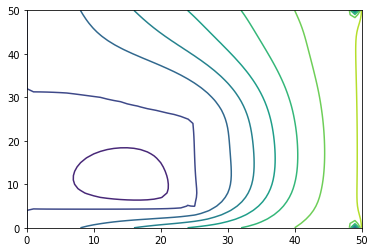

In [17]:
fig = plt.figure()
plt.contour(u)
plt.show()

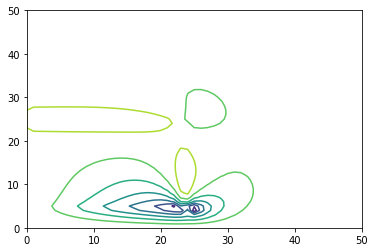

In [18]:
fig = plt.figure()
plt.contour(w)
plt.show()

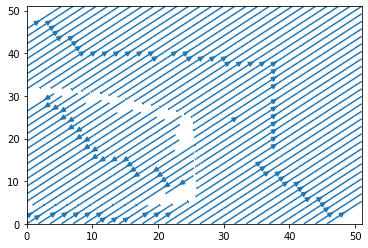

In [19]:
fig = plt.figure()
x = np.linspace(0,N+1,N+1)
y = np.linspace(0,N+1,N+1)
X,Y = np.meshgrid(x,y)
plt.streamplot(X,Y,u,u)
plt.show()